In [1]:
#Installing BlackBoxAuditing;The BlackBoxAuditing package has a few datasets preloaded and ready to use for auditing.
#!pip install BlackBoxAuditing

In [2]:
#Installing Python,matplotlib and BlackBoxAuditing packages
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

from sklearn.linear_model import LogisticRegression as LR

from BlackBoxAuditing.model_factories import SVM

from BlackBoxAuditing.data import load_from_file
from BlackBoxAuditing.model_factories.AbstractModelFactory import AbstractModelFactory
from BlackBoxAuditing.model_factories.AbstractModelVisitor import AbstractModelVisitor

import pandas as pd
import numpy as np
import random

import BlackBoxAuditing as BBA

import pickle

In [3]:
#Using a preloaded dataset
ricci_data = BBA.load_data("ricci")

In [4]:
#Display the type of the data
type(ricci_data)

tuple

In [5]:
#Display the data from the dataset
ricci_data

(['Position', 'Oral', 'Written', 'Race', 'Combine', 'Class'],
 [['Captain', 80.0, 95, 'W', 89.0, '1'],
  ['Captain', 82.38, 87, 'W', 85.152, '1'],
  ['Captain', 76.19, 84, 'W', 80.876, '1'],
  ['Captain', 76.19, 82, 'H', 79.676, '1'],
  ['Captain', 76.19, 82, 'W', 79.676, '1'],
  ['Captain', 84.29, 72, 'W', 76.916, '1'],
  ['Captain', 73.81, 77, 'W', 75.724, '1'],
  ['Captain', 73.33, 74, 'W', 73.732, '1'],
  ['Captain', 82.38, 64, 'W', 71.352, '1'],
  ['Captain', 78.57, 64, 'W', 69.828, '0'],
  ['Captain', 71.43, 68, 'W', 69.372, '0'],
  ['Captain', 59.05, 76, 'W', 69.22, '0'],
  ['Captain', 60.48, 75, 'H', 69.192, '0'],
  ['Captain', 57.14, 75, 'W', 67.856, '0'],
  ['Captain', 67.14, 65, 'H', 65.856, '0'],
  ['Captain', 55.24, 68, 'W', 62.896, '0'],
  ['Captain', 58.57, 65, 'H', 62.428, '0'],
  ['Captain', 48.57, 69, 'W', 60.828, '0'],
  ['Captain', 67.62, 56, 'B', 60.648, '0'],
  ['Captain', 57.14, 61, 'H', 59.456, '0'],
  ['Captain', 70.48, 50, 'B', 58.192, '0'],
  ['Captain', 53.8

In [6]:
#Display total features of the dataset
len(ricci_data)

6

In [7]:
# In the output-> Header->0,training data->1,testing data->2, response header->3, feature to ignore->4, correct datatype->5

for i in range(len(ricci_data)):
    print(i)
    print(type(ricci_data[0]))

0
<class 'list'>
1
<class 'list'>
2
<class 'list'>
3
<class 'list'>
4
<class 'list'>
5
<class 'list'>


In [8]:
#Display of header
ricci_data[0]

['Position', 'Oral', 'Written', 'Race', 'Combine', 'Class']

In [9]:
#Total Number of Rows
len(ricci_data[1])

59

In [10]:
#Training data (display randomly)
ricci_data[1][:10]

[['Captain', 80.0, 95, 'W', 89.0, '1'],
 ['Captain', 82.38, 87, 'W', 85.152, '1'],
 ['Captain', 76.19, 84, 'W', 80.876, '1'],
 ['Captain', 76.19, 82, 'H', 79.676, '1'],
 ['Captain', 76.19, 82, 'W', 79.676, '1'],
 ['Captain', 84.29, 72, 'W', 76.916, '1'],
 ['Captain', 73.81, 77, 'W', 75.724, '1'],
 ['Captain', 73.33, 74, 'W', 73.732, '1'],
 ['Captain', 82.38, 64, 'W', 71.352, '1'],
 ['Captain', 78.57, 64, 'W', 69.828, '0']]

In [11]:
#testing data
df = pd.DataFrame(ricci_data[2])
df.columns = ricci_data[0]
df.head()

,Position,Oral,Written,Race,Combine,Class
0,Captain,89.52,95,W,92.808,1
1,Captain,88.57,76,W,81.028,1
2,Captain,70.00,84,H,78.400,1
3,Captain,73.81,81,W,78.124,1
4,Captain,87.62,69,W,76.448,1


In [12]:
#Organizing dataset by Race (testing dataset)
df.groupby('Race').count()

,Position,Oral,Written,Combine,Class
Race,,,,,
B,16,16,16,16,16
H,11,11,11,11,11
W,32,32,32,32,32


In [13]:
#Organizing dataset by Position(testing dataset)
df.groupby('Position').count()

,Oral,Written,Race,Combine,Class
Position,,,,,
Captain,18,18,18,18,18
Lieutenant,41,41,41,41,41


In [14]:
#Organizing dataset by Race and position(testing dataset)
df.groupby(['Position', 'Race']).count()

Oral  Written  Combine  Class
Position   Race                               
Captain    B        5        5        5      5
           H        3        3        3      3
           W       10       10       10     10
Lieutenant B       11       11       11     11
           H        8        8        8      8
           W       22       22       22     22

In [15]:
# test dataset (display selection 10 rows randomly)
ricci_data[2][:10]

[['Captain', 89.52, 95, 'W', 92.808, '1'],
 ['Captain', 88.57, 76, 'W', 81.028, '1'],
 ['Captain', 70.0, 84, 'H', 78.4, '1'],
 ['Captain', 73.81, 81, 'W', 78.124, '1'],
 ['Captain', 87.62, 69, 'W', 76.448, '1'],
 ['Captain', 80.0, 74, 'W', 76.4, '1'],
 ['Captain', 79.05, 74, 'H', 76.02, '1'],
 ['Captain', 76.67, 74, 'W', 75.068, '1'],
 ['Captain', 82.38, 70, 'B', 74.952, '1'],
 ['Captain', 70.0, 76, 'W', 73.6, '1']]

In [16]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [17]:
# We then train the auditor with a few simple lines of code. 
# In this case, we are learning how the library works and do not have an existing model, 
# but the library works with this possibility by providing a model factory from which we 
# can select some plausible models. In this case we’ll select the SVM option, which 
# itself relies on an import from sklearn, which we can see by looking at the 
# course code of SVM.py in the model_factories submodule of BBA.
#We then train, which entails deciding on an output directory because the results 
#of the audit are saved in a variety of formats.
#initialize the auditor and set parameters
auditor                        = BBA.Auditor()
auditor.ModelFactory           = SVM #supervised learning model, classify slash regrassion of the data
# call the auditor with the data
auditor(ricci_data, output_dir ="ricci-audit-output")

Training initial model. (12:24:20)
Calculating original model statistics on test data:
	Training Set:
		Conf-Matrix: {'1': {'1': 24}, '0': {'0': 35}}
		accuracy: 1.0
		BCR: 1.0
	Testing Set:
		Conf-Matrix {'1': {'1': 29, '0': 3}, '0': {'0': 23, '1': 4}}
		accuracy: 0.8813559322033898
		BCR: 0.8790509259259259
Auditing: 'Position' (1/5). (12:24:20)
Auditing: 'Oral' (2/5). (12:24:20)
Auditing: 'Written' (3/5). (12:24:21)
Auditing: 'Race' (4/5). (12:24:22)
Auditing: 'Combine' (5/5). (12:24:22)
Audit file dump set to False: Only mininal audit files have been saved.
Audit files dumped to: ricci-audit-output.

Ranking audit files by accuracy. (12:24:23)
	[('Combine', 0.423728813559322), ('Oral', 0.3728813559322034), ('Written', 0.3728813559322034), ('Race', 0.15254237288135597), ('Position', 0.016949152542372836)] (12:24:23)
Ranking audit files by BCR. (12:24:23)
	[('Combine', 0.45138888888888895), ('Oral', 0.39583333333333337), ('Written', 0.39583333333333337), ('Race', 0.140625), ('Positio

# Output Analysis:
-Based on the confusion matric, the accuracy level of training data is 1 and balance classification rate is 1.These two rates indicate the model can predict true positive and true negative correctly.

-Based on the confusion matric, the accuracy level of testing data is 0.8813559322033898 and balance classification rate is 0.8790509259259259, which is very close to 1. These two rates indicate the model can predict true positive and true negative rate almost correctly.

-Based on the output, combine feature has the most accuracy.

In [18]:
# We can load some of the audit data back into our Jupyter notebook to examine it there
acc_data = pd.read_csv("ricci-audit-output/accuracy.png.data")
print(acc_data)

    Repair Level  Position      Oral   Written      Race   Combine
0            0.0  0.881356  0.881356  0.881356  0.881356  0.881356
1            0.1  0.881356  0.915254  0.898305  0.898305  0.847458
2            0.2  0.881356  0.898305  0.864407  0.881356  0.813559
3            0.3  0.864407  0.847458  0.864407  0.847458  0.796610
4            0.4  0.881356  0.796610  0.813559  0.830508  0.779661
5            0.5  0.864407  0.796610  0.830508  0.796610  0.847458
6            0.6  0.864407  0.762712  0.762712  0.796610  0.796610
7            0.7  0.881356  0.694915  0.762712  0.796610  0.728814
8            0.8  0.864407  0.610169  0.677966  0.779661  0.542373
9            0.9  0.864407  0.610169  0.542373  0.779661  0.559322
10           1.0  0.864407  0.508475  0.508475  0.728814  0.457627


# Repair Level Output Analysis:
The 'combine' feature influences accuracy most compared to the other features with the changing of repair level from 0 to 1.
Accuracy is changes most in 'combine', 'written' and 'oral' features with the changing of repair level; race feature has a little influence in accuracy and position feature has minimum influence in the accuracy. Considering the accuracy level and the influence features, it can be said that model is fair enough.

In [19]:
# We can then look at influence — that is, how much the accuracy changes from not obscuring a feature at all to completely obscuring it.
def influence(df):
    return (df.iloc[0][1:] - df.iloc[-1][1:])

influence(acc_data)

Position    0.016949
Oral        0.372881
Written     0.372881
Race        0.152542
Combine     0.423729
dtype: float64

In [22]:
# And we can look at what happens if we want to see the influence if we imagine a repair level of 0.5
def influence_partial_repair(df):
    return (df.iloc[0][1:] - df.iloc[5][1:])

influence_partial_repair(acc_data)

Position    0.016949
Oral        0.084746
Written     0.050847
Race        0.084746
Combine     0.033898
dtype: float64

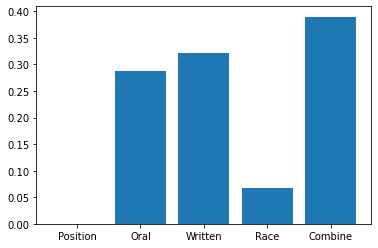

In [23]:
# you can visualize the difference per feature between a full repair and partial repair. Note this merely contains redundant information compared to the accuracy plot.
import matplotlib
deltas = influence(acc_data) - influence_partial_repair(acc_data)
fig = plt.figure()
plt.bar(x = deltas.index, height = deltas.values)
fig
#plt.show()

# Graph Analysis:

Figure shows the difference per feature between a full repair and partial repair. We can see that, accuracy is changes most in combine, written and oral features; race feature has a little impact in accuracy and position feature has almost no influence in the accuracy.

# Example-2

In [24]:
# Example 2
## first produce the data
## not covered in book, just background code needed to run example
SAMPLE_SIZE = 1000
credit_score = np.array(np.random.randn(SAMPLE_SIZE)) * 100 + 600
gender = np.array(random.choices(["female", "male", "non-binary", "prefer not to answer"], 
                         weights = [0.48, 0.48, 0.02, 0.02], 
                        k = SAMPLE_SIZE))
age = np.array(random.choices(range(18, 80), k = SAMPLE_SIZE))
length_employment = np.rint((age - 18) * np.random.uniform(size=SAMPLE_SIZE))
employee_score = credit_score * length_employment + random.choices(range(-1000, 1000), k = SAMPLE_SIZE)

hire = np.logical_or(np.logical_and(employee_score > 9000, np.logical_or(gender == "male", age < 50)),
                     employee_score > 9500).astype(float)                     
female = np.where(gender == 'female', 1, 0)
male = np.where(gender == 'male', 1, 0)
nonbinary = np.where(gender == 'nonbinary', 1, 0)
df = pd.DataFrame(
    {
        'credit_score'     : credit_score,
        'gender'           : gender,
        'age'              : age,
        'length_employment': length_employment,
        'employee_score'   : employee_score,
        'female'           : female,
        'male'             : male,
        'nonbinary'        : nonbinary,
        'hire'             : hire
    })
col_names = ['credit_score', 'age', 
             'length_employment', 'employee_score', 
            'female', 'male', 'nonbinary',
            'hire']
df.to_csv("synth_data.csv", 
          index=False, 
          columns=col_names)

In [25]:
# Data Load
synthetic_data = load_from_file("synth_data.csv", 
                                correct_types = np.repeat([float], [len(col_names)]), 
                                response_header = 'hire',
                               train_percentage = 0.5)

In [26]:
#Display of the dataset
synthetic_data

(['credit_score',
  'age',
  'length_employment',
  'employee_score',
  'female',
  'male',
  'nonbinary',
  'hire'],
 [[535.6465504699339, 56.0, 14.0, 6859.051706579075, 1.0, 0.0, 0.0, 0.0],
  [533.9545909870775, 66.0, 2.0, 551.909181974155, 0.0, 1.0, 0.0, 0.0],
  [719.5152796881298, 56.0, 1.0, 1247.5152796881298, 0.0, 1.0, 0.0, 0.0],
  [483.54405301082636, 41.0, 5.0, 1958.7202650541317, 1.0, 0.0, 0.0, 0.0],
  [755.6006152076975, 58.0, 26.0, 19738.615995400134, 0.0, 1.0, 0.0, 1.0],
  [488.44903088526223, 51.0, 17.0, 7462.633525049458, 1.0, 0.0, 0.0, 0.0],
  [578.6324898376586, 24.0, 6.0, 3382.7949390259514, 1.0, 0.0, 0.0, 0.0],
  [477.2891952473656, 54.0, 22.0, 10942.362295442044, 0.0, 1.0, 0.0, 1.0],
  [412.52290607290513, 44.0, 14.0, 6748.320685020672, 1.0, 0.0, 0.0, 0.0],
  [800.7406456265434, 40.0, 1.0, 559.7406456265434, 0.0, 1.0, 0.0, 0.0],
  [760.0397274290641, 75.0, 7.0, 5949.278092003448, 1.0, 0.0, 0.0, 0.0],
  [640.9097933159724, 49.0, 10.0, 7178.097933159724, 0.0, 1.0, 0.0,

In [27]:
#Display type of the dataset
type(synthetic_data)

tuple

In [30]:
#Display header of the dataset
synthetic_data[0]

['credit_score',
 'age',
 'length_employment',
 'employee_score',
 'female',
 'male',
 'nonbinary',
 'hire']

In [31]:
#Display total rows of the dataset
len(synthetic_data[1])

500

In [32]:
# Defining train and test data
#But then another detour to build the "proprietary model" that will be opaque to BBA
train_data         = pd.DataFrame(synthetic_data[1])
test_data          = pd.DataFrame(synthetic_data[2])
train_data.columns = test_data.columns = col_names

In [33]:
#Display of Training datas
train_data.head()

,credit_score,age,length_employment,employee_score,female,male,nonbinary,hire
0,535.646550,56.0,14.0,6859.051707,1.0,0.0,0.0,0.0
1,533.954591,66.0,2.0,551.909182,0.0,1.0,0.0,0.0
2,719.515280,56.0,1.0,1247.515280,0.0,1.0,0.0,0.0
3,483.544053,41.0,5.0,1958.720265,1.0,0.0,0.0,0.0
4,755.600615,58.0,26.0,19738.615995,0.0,1.0,0.0,1.0


In [34]:
#Display of testing data
df = pd.DataFrame(synthetic_data[2])
df.columns = synthetic_data[0]
df.head()

,credit_score,age,length_employment,employee_score,female,male,nonbinary,hire
0,625.487987,31.0,9.0,6221.391880,0.0,1.0,0.0,0.0
1,620.487375,50.0,19.0,11275.260117,1.0,0.0,0.0,1.0
2,458.345048,51.0,9.0,5059.105428,1.0,0.0,0.0,0.0
3,709.340407,19.0,0.0,-647.000000,0.0,1.0,0.0,0.0
4,739.076994,31.0,12.0,9049.923923,1.0,0.0,0.0,1.0


In [35]:
#Organizing dataset by female','male','nonbinary
df.groupby(['female','male','nonbinary']).count()

credit_score  age  length_employment  employee_score  \
female male nonbinary                                                         
0.0    0.0  0.0                  25   25                 25              25   
       1.0  0.0                 232  232                232             232   
1.0    0.0  0.0                 243  243                243             243   

                       hire  
female male nonbinary        
0.0    0.0  0.0          25  
       1.0  0.0         232  
1.0    0.0  0.0         243

In [36]:
#Organizing dataset by hire
df.groupby('hire').count()

,credit_score,age,length_employment,employee_score,female,male,nonbinary
hire,,,,,,,
0.0,295,295,295,295,295,295,295
1.0,205,205,205,205,205,205,205


In [37]:
#Organizing dataset by Position, female,male,nonbinary
df.groupby(['hire', 'female','male','nonbinary']).count()

credit_score  age  length_employment  \
hire female male nonbinary                                         
0.0  0.0    0.0  0.0                  17   17                 17   
            1.0  0.0                 131  131                131   
     1.0    0.0  0.0                 147  147                147   
1.0  0.0    0.0  0.0                   8    8                  8   
            1.0  0.0                 101  101                101   
     1.0    0.0  0.0                  96   96                 96   

                            employee_score  
hire female male nonbinary                  
0.0  0.0    0.0  0.0                    17  
            1.0  0.0                   131  
     1.0    0.0  0.0                   147  
1.0  0.0    0.0  0.0                     8  
            1.0  0.0                   101  
     1.0    0.0  0.0                    96

In [39]:
X = train_data.iloc[:, :-1] #dataset.iloc[:, :-1] means until the last column
Y = train_data.iloc[:, -1] #dataset.iloc[:, -1] it means the last column

In [40]:
#Applying Linear regression (LR) model
#Linear regression finds the optimal linear relationship between independent variables and dependent variables, 
#thus makes prediction accordingly. 
lr = LR(max_iter=2000).fit(X, Y)

# Linear Regression Scoring: 
-What: This type of scoring is performed by implementing linear regression algorithm on the random sample of data. The process includes scoring techniques on variables that have linear dependencies.
-How Calculate: In simple linear regression, we predict scores on one variable from the scores on a second variable. The variable we are predicting is called the criterion variable and is referred to as Y. The variable we are basing our predictions on is called the predictor variable and is referred to as X.


In [42]:
#Score using the using the scoring option on the given test data and labels.
X_test = test_data.iloc[:, :-1] #dataset.iloc[:, :-1] means until the last column
Y_test = test_data.iloc[:, -1] #dataset.iloc[:, -1] it means the last column
lr.score(X_test, Y_test)

0.972

# Comment on LR Scoring
-The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y , disregarding the input features, would get a score of 0.0.
-The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.

-Here, the lr score is 0.972, which indicates good prediction by the model.

In [43]:
#picklening model object
#wb-Which means that you should always open a pickle file in binary mode: “wb” to write it.
with open( 'lr.pickle', 'wb' ) as f:
    pickle.dump(lr, f ) # the method for saving the data out to the designated pickle file

In [44]:
#rb-Which means that you should always open a pickle file in binary mode and “rb” to read it
with open( 'lr.pickle', 'rb' ) as f:
    lr2 = pickle.load(f)

In [45]:
# Return to on-topic example of auditing a black box model
#provide the name of the model factory so that the name can be printed in the logs.
#provide the class of the model factory so that an instance can be made upon request by the Auditor object.

class HirePredictorBuilder(AbstractModelFactory):
    def __init__(self, *args, **kwargs):
        AbstractModelFactory.__init__(self, *args, **kwargs)
        self.verbose_factory_name = "HirePredictor" 
    def build(self, train_set):
        return HirePredictor() 

class HirePredictor(AbstractModelVisitor):
    def __init__(self):
        with open( 'lr.pickle', 'rb' ) as f:
            self.lr = pickle.load(f) 

    def test(self, test_set, test_name=""):
        return [[v[-1], self.lr.predict(np.expand_dims(np.array(v[:-1]), axis = 0))] for v in test_set] 


In [46]:
#Ingone warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
#initialize the auditor and set parameters
auditor                            = BBA.Auditor()
#provide the name of the model factory 
auditor.ModelFactory               = HirePredictorBuilder
# call the auditor with the data
#output_dir*: name of the directory that audit files will be dumped to.
auditor(synthetic_data, output_dir = "synthetic-audit-output") 

Training initial model. (14:01:43)
Calculating original model statistics on test data:
	Training Set:
		Conf-Matrix: {0.0: {0.0: 308, 1.0: 6}, 1.0: {1.0: 181, 0.0: 5}}
		accuracy: 0.978
		BCR: 0.9770049996575577
	Testing Set:
		Conf-Matrix {0.0: {0.0: 286, 1.0: 9}, 1.0: {1.0: 200, 0.0: 5}}
		accuracy: 0.972
		BCR: 0.9725506407606449
Auditing: 'credit_score' (1/7). (14:01:43)
Auditing: 'age' (2/7). (14:01:44)
Auditing: 'length_employment' (3/7). (14:01:45)
Auditing: 'employee_score' (4/7). (14:01:47)
Auditing: 'female' (5/7). (14:01:48)
Auditing: 'male' (6/7). (14:01:49)
Auditing: 'nonbinary' (7/7). (14:01:50)
Audit file dump set to False: Only mininal audit files have been saved.
Audit files dumped to: synthetic-audit-output.

Ranking audit files by accuracy. (14:01:51)
	[('length_employment', 0.562), ('credit_score', 0.382), ('employee_score', 0.382), ('age', 0.21199999999999997), ('male', 0.026000000000000023), ('female', 0.010000000000000009), ('nonbinary', 0.0)] (14:01:51)
Ranking 

# Output Analysis:

-Based on the confusion matric, the accuracy level of training data is 0.978 and balance classification rate is 0.9770049996575577, which is very close to 1. These two rates indicate the model can almost correctly predict true positive and true negative rate almost correctly.

-Based on the confusion matric, the accuracy level of testing data is 0.972 and balance classification rate is 0.9725506407606449, which is very close to 1. These two rates indicate the model can predict almost correctly true positive and true negative rate almost correctly.

-As the prediction accuracy based on the confusion matrix and balance classification rate is higher and close to 1, I think the model is fair enough to predict hiring accurately considering the features output.

-Ranked Features by accuracy: [('length_employment', 0.562), ('credit_score', 0.382), ('employee_score', 0.382), ('age', 0.21199999999999997), ('male', 0.026000000000000023), ('female', 0.010000000000000009), ('nonbinary', 0.0)]

-Ranked Features by BCR: [('credit_score', 0.4725506407606449), ('length_employment', 0.4725506407606449), ('employee_score', 0.4725506407606449), ('age', 0.19603141794129808), ('male', 0.03170731707317076), ('female', 0.015915667631252628), ('nonbinary', 0.0)]

-A little differectce is showing in ranking features by accuracy and BCR. According to the confusion matrix accuracy 'length_employment' has the highest accuracy and 'credit_score' has the highest accuracy according to the BCR.

In [52]:
# We can load some of the audit data back into our Jupyter notebook to examine it there
acc_data = pd.read_csv("synthetic-audit-output/accuracy.png.data")
print(acc_data)

    Repair Level  credit_score    age  length_employment  employee_score  \
0            0.0         0.972  0.972              0.972           0.972   
1            0.1         0.960  0.968              0.934           0.926   
2            0.2         0.934  0.962              0.832           0.902   
3            0.3         0.922  0.942              0.712           0.876   
4            0.4         0.882  0.928              0.532           0.828   
5            0.5         0.778  0.888              0.412           0.794   
6            0.6         0.630  0.846              0.410           0.738   
7            0.7         0.590  0.822              0.410           0.712   
8            0.8         0.590  0.800              0.410           0.692   
9            0.9         0.590  0.766              0.408           0.622   
10           1.0         0.590  0.760              0.410           0.590   

    female   male  nonbinary  
0    0.972  0.972      0.972  
1    0.968  0.972      0.

# Repair Level Output Analysis:

-The 'length_employment' feature influences accuracy most compared to the other features with the changing of repair level from 0 to 1; the accuracy changes most at repair level 0.5 for 'length_employment' feature.

-Accuracy is changes most in 'length_employment', 'credit_score', 'employee_score' and 'age' features with the changing of repair level.

-'male','female'and 'nonbinary' features have almost no influence in the accuracy for changing level of repair; that means, the model is not biased by the influence of gender.


In [53]:
# We can then look at influence — that is, how much the accuracy changes from not obscuring a feature at
#all to completely obscuring it.
def influence(df):
    return (df.iloc[0][1:] - df.iloc[-1][1:])

influence(acc_data)

credit_score         0.382
age                  0.212
length_employment    0.562
employee_score       0.382
female               0.010
male                 0.026
nonbinary            0.000
dtype: float64

In [54]:
# And we can look at what happens if we want to see the influence if we imagine a repair level of 0.5
def influence_partial_repair(df):
    return (df.iloc[0][1:] - df.iloc[5][1:])

influence_partial_repair(acc_data)

credit_score         0.194
age                  0.084
length_employment    0.560
employee_score       0.178
female               0.002
male                 0.006
nonbinary            0.000
dtype: float64

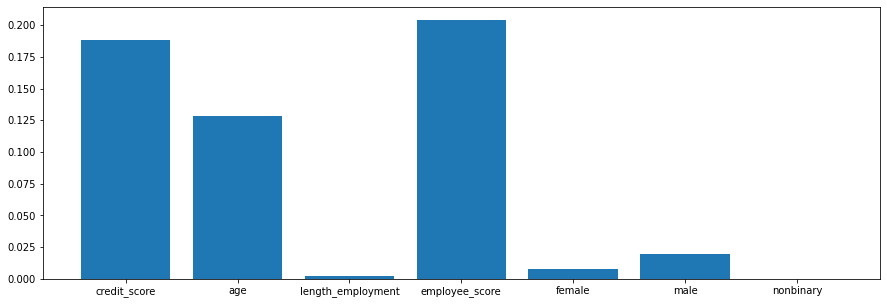

In [55]:
# you can visualize the difference per feature between a full repair and partial repair.
#Note this merely contains redundant information compared to the accuracy plot.
import matplotlib
deltas = influence(acc_data) - influence_partial_repair(acc_data)
fig= plt.figure(figsize=(15, 5))
#fig = plt.figure()
plt.bar(x = deltas.index, height = deltas.values)
fig

# Analysis of the Graph and influence_partial_repair: 

From the graph and influence_partial_repair output it has been seen that, the 'length_employment' has maximum impact to accuracy while repair it as partial(0.5) levelinsted of fully obscured. The employee_score, credit_score, age indicate change in accuracy when these features are fully obscured rather than partially obscured. The 'male','female'and 'nonbinary' features have almost no influence in the accuracy for changing level of repair.